In [1]:
import numpy as np

def pontos_2d(P):
    np.random.seed(31)
    X = [2*np.random.random_sample(P)-1, 2*np.random.random_sample(P)-1]
    X = np.array(X)
    Xp = []
    t = 0.9
    R = [[np.cos(t), -np.sin(t)],[np.sin(t), np.cos(t)]]
    for i in range(P):
        if ((X[0][i]**2)/0.9712 + (X[1][i]**2)/0.534 - 1) < 0:
            U = np.dot(R,X[:,i])
            Xp.append(U)
    Xp = np.array(Xp)
    return Xp

def center(X):
    P = len(X)
    s = [0,0]
    print(P)
    for i in range(P):
        s = s + X[i,:]
        #print([s,X[i,:]])
    X_mean = s / P
    X_centered = X - X_mean
    return X_centered


In [2]:
def PCA(X):
    P = len(X[0,:])
    Cov = 1/P * np.dot(X,X.T)
    D,V = np.linalg.eigh(Cov)
    return D,V

28320
(28320, 2)
[array([0.13215758, 0.24338625]), array([[-0.78404027,  0.62070996],
       [ 0.62070996,  0.78404027]])]


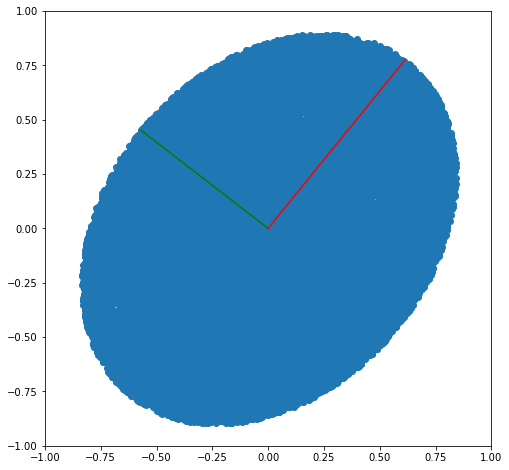

In [3]:
import matplotlib.pyplot as plt
P = 50000
X = pontos_2d(P)
X = center(X)
print(np.shape(X))
[D,V] = PCA(X.T)
print([D,V])

fig = plt.figure(figsize = (8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
ax = plt.gca()

ax.scatter(X[:,0],X[:,1])

x = [0,2*np.sqrt(D[0])*V[0][0]]
y = [0,2*np.sqrt(D[0])*V[0][1]]
plt.plot(x,y,'g')

x = [0,2*np.sqrt(D[1])*V[1][0]]
y = [0,2*np.sqrt(D[1])*V[1][1]]
plt.plot(x,y,'r')
plt.show()